In [134]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [135]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [136]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
test_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [138]:
pd.concat([train_df.drop(columns=['Survived']),test_df])

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [139]:
df = pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309)

<Axes: ylabel='Density'>

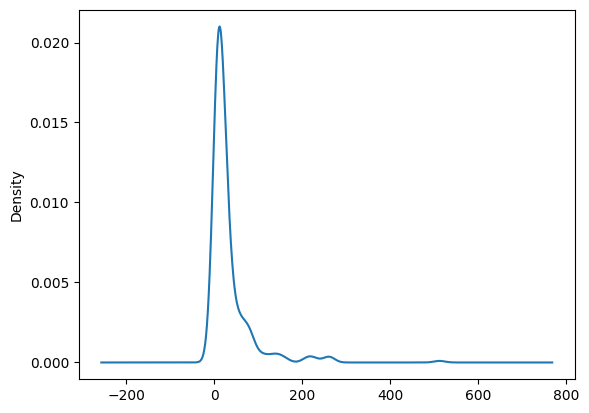

In [140]:
df['Fare'].plot(kind='kde')

In [141]:
# Sample size = 50 -> 100 times
samples = []
for i in range(100):
    samples.append(df['Fare'].dropna().sample(50).values.tolist())

In [142]:
samples

[[8.6625,
  53.1,
  8.6625,
  7.225,
  7.8958,
  91.0792,
  8.05,
  8.85,
  46.9,
  106.425,
  26.55,
  14.4542,
  110.8833,
  7.4958,
  8.05,
  93.5,
  81.8583,
  211.5,
  7.8958,
  7.225,
  7.4958,
  8.5167,
  34.375,
  16.7,
  227.525,
  27.7208,
  12.0,
  7.75,
  8.05,
  8.6625,
  7.7958,
  7.225,
  13.0,
  13.4167,
  120.0,
  262.375,
  9.5,
  7.7208,
  7.225,
  512.3292,
  7.225,
  7.8792,
  31.275,
  53.1,
  8.05,
  29.125,
  13.0,
  133.65,
  7.925,
  7.8958],
 [7.55,
  13.0,
  8.05,
  13.0,
  26.25,
  31.3875,
  7.8958,
  10.1708,
  6.45,
  13.0,
  73.5,
  6.4958,
  27.7208,
  135.6333,
  69.55,
  9.225,
  23.0,
  7.75,
  22.025,
  51.8625,
  55.4417,
  52.0,
  26.55,
  9.5,
  7.75,
  26.0,
  78.85,
  13.0,
  15.5,
  13.0,
  9.825,
  77.9583,
  47.1,
  7.8958,
  8.05,
  89.1042,
  13.5,
  7.55,
  8.6625,
  46.9,
  7.25,
  19.2583,
  15.5,
  7.25,
  8.05,
  26.0,
  7.25,
  57.9792,
  65.0,
  10.5],
 [8.05,
  25.5875,
  7.75,
  7.75,
  6.75,
  7.8958,
  14.5,
  13.0,
  30.0,
  2

In [143]:
len(samples)

100

In [144]:
np.array(samples).shape

(100, 50)

In [145]:
samples = np.array(samples)

In [146]:
samples

array([[  8.6625,  53.1   ,   8.6625, ..., 133.65  ,   7.925 ,   7.8958],
       [  7.55  ,  13.    ,   8.05  , ...,  57.9792,  65.    ,  10.5   ],
       [  8.05  ,  25.5875,   7.75  , ...,  26.    ,  56.9292,  78.2667],
       ...,
       [ 14.5   ,   7.8958,   6.75  , ...,   8.05  ,  10.5   ,   7.7958],
       [  7.25  ,  93.5   , 151.55  , ...,  26.3875,  10.5   ,   7.75  ],
       [ 23.45  ,  21.6792,   7.4958, ...,  61.175 ,  63.3583,  25.7417]])

In [147]:
samples.mean(axis=1)

array([50.695414, 28.03383 , 32.666   , 30.00533 , 38.987002, 36.695334,
       38.431416, 39.452084, 34.430838, 44.854168, 36.84725 , 44.56675 ,
       35.5995  , 31.499416, 29.588916, 39.921   , 39.910166, 27.941082,
       37.468748, 33.734916, 41.137748, 38.539834, 44.297584, 36.883086,
       33.954916, 35.053414, 43.404414, 36.493832, 29.231998, 32.039998,
       35.683172, 31.846914, 43.554998, 50.662082, 24.615998, 36.232002,
       34.564584, 25.165082, 38.821246, 40.738664, 22.211496, 27.24716 ,
       37.33942 , 16.555246, 46.006164, 28.579084, 23.222496, 27.937496,
       27.48466 , 26.29583 , 40.214256, 38.724752, 30.684834, 30.95108 ,
       46.32975 , 33.820248, 34.526168, 37.242998, 32.845418, 26.560586,
       35.300246, 40.494832, 34.335918, 39.210248, 30.310248, 37.984164,
       24.48725 , 36.241754, 33.201834, 44.43267 , 25.590416, 33.673664,
       28.448668, 29.4475  , 33.211256, 16.581746, 37.755166, 38.351   ,
       22.388166, 38.675582, 30.78325 , 30.635416, 

In [148]:
samples.mean(axis=1).shape

(100,)

In [149]:
sampling_means = samples.mean(axis=1)

In [150]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

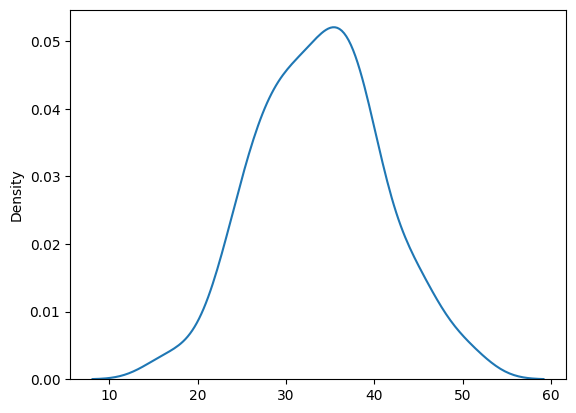

In [151]:
sns.kdeplot(sampling_means)

In [152]:
sampling_means.mean()

33.79364354

In [153]:
sampling_means.std()

7.0142799419937205

In [154]:
sampling_means.std()/np.sqrt(50)

0.9919689824249086

In [155]:
lower_limit = sampling_means.mean() - 2*sampling_means.std()/np.sqrt(50) 
upper_limit = sampling_means.mean() + 2*sampling_means.std()/np.sqrt(50) 

In [156]:
print('The range is',lower_limit,'-',upper_limit)

The range is 31.80970557515018 - 35.77758150484981


In [157]:
df['Fare'].mean()

33.29547928134557